<h1><span style="color: #993300;">Python Class Project #2</span></h1>
<h2><span style="color: #993300;">The Lotto Winning Number Analysis</span></h2>
<p><span style="color: #0000ff;">[Project Description]&nbsp;</span></p>
<p><span style="color: #000000;">In this class project, we analyze the winning numbers of lotto games.&nbsp;There are over the 700 games and 6 winning numbers at each game. We can search and find a lot of lotto number recommending on-line sites. They are using their own recommending algorithms. For example,&nbsp;</span></p>
<ul>
<li><span style="color: #000000;">The accumulated &nbsp;frequency of the each number in total games</span></li>
<li><span style="color: #000000;">The accumulated &nbsp;frequency of the each number in the last N games</span></li>
<li><span style="color: #000000;">What is the most frequently used number ?</span></li>
<li><span style="color: #000000;">What is the least frequently used number ?</span></li>
<li><span style="color: #000000;">What is the most/least frequently used number in the last N weeks?</span></li>
<li><span style="color: #000000;">How is the average gap between max and min number?</span></li>
<li><span style="color: #000000;">Random 6 numbers that are satisfied with&nbsp;</span>
<ul>
<li><span style="color: #000000;">Max - Min &lt; average of gap</span></li>
<li><span style="color: #000000;">in the top N of the accumulated frequency</span></li>
<li><span style="color: #000000;">not in the least M of accumulated frequency</span></li>
</ul>
</li>
</ul>
<p><span style="color: #000000;">&nbsp;</span></p>

<h2><span style="color: #993300;">Pandas</span></h2>
<ul>
<li class="nav-item nav-item-0"><a href="http://pandas.pydata.org/pandas-docs/stable/index.html">pandas 0.19.2 documentation</a> &raquo;</li>
</ul>
<img src="http://www.clipular.com/c/5725045629648896.png?k=x2OJ_Y1gT74aYebqP4XbbS4yPQA" >

<h2>&nbsp;<a href="https://github.com/dblabsju/05979-01-Python/blob/master/Panda%20Intro.ipynb">Introduction Pandas </a></h2>

<h2><span style="color: #993300;">Getting Winning Numbers from a CSV File </span></h2>

<h3>CSV File Reading and Writing</h3>
<p>&nbsp;</p>
<p>CSV (Comma Separated Values) format is the most common import and export format for spreadsheets and databases.</p>
<p>&nbsp;</p>
<p><code class="descclassname">csv.</code><code class="descname">reader</code><span class="sig-paren">(</span><em>csvfile</em>, <em>dialect='excel'</em>, <em>**fmtparams</em><span class="sig-paren">)</span></p>
<p>A short usage example:</p>
<div class="highlight-python">
<div class="highlight"><span class="copybutton" title="Hide the prompts and output">&gt;&gt;&gt;</span>
<pre><span class="gp">&gt;&gt;&gt; </span><span class="kn">import</span> <span class="nn">csv</span>
<span class="gp">&gt;&gt;&gt; </span><span class="k">with</span> <span class="nb">open</span><span class="p">(</span><span class="s1">'eggs.csv'</span><span class="p">,</span> <span class="s1">'rb'</span><span class="p">)</span> <span class="k">as</span> <span class="n">csvfile</span><span class="p">:</span>
<span class="gp">... </span>    <span class="n">spamreader</span> <span class="o">=</span> <span class="n">csv</span><span class="o">.</span><span class="n">reader</span><span class="p">(</span><span class="n">csvfile</span><span class="p">,</span> <span class="n">delimiter</span><span class="o">=</span><span class="s1">' '</span><span class="p">,</span> <span class="n">quotechar</span><span class="o">=</span><span class="s1">'|'</span><span class="p">)</span>
<span class="gp">... </span>    <span class="k">for</span> <span class="n">row</span> <span class="ow">in</span> <span class="n">spamreader</span><span class="p">:</span>
<span class="gp">... </span>        <span class="k">print</span> <span class="s1">', '</span><span class="o">.</span><span class="n">join</span><span class="p">(</span><span class="n">row</span><span class="p">)</span>
<span class="go">Spam, Spam, Spam, Spam, Spam, Baked Beans</span>
<span class="go">Spam, Lovely Spam, Wonderful Spam</span>
</pre>
</div>
</div>
<div class="versionchanged">
<p>&nbsp;</p>
</div>

<h2><span style="color: #993300;">Preliminaries for Analysis</span></h2>

<ul>
<li>All list of winning numbers for all games</li>
<li>Gap of Max and Min Numbers of Each Game</li>
<li>Total count of Outcomes for each Number</li>
<li>Total count of Outcomes for each Number in the last N weeks</li>
<li>The number of Games that the gap is over the 40, 30, 20</li>
</ul>

<img src="http://www.clipular.com/c/6421260927238144.png?k=sDJTf0RwX4aMscfcnvOUb_s647c">

<img src="http://www.clipular.com/c/6592091372388352.png?k=TBoK2Pcb0CL71Lh0uijsfTIAkro">

<img src="http://www.clipular.com/c/6284414008164352.png?k=pZaObr23V2pJu9hGHSTa6bhYmaM">

<h2><span style="color: #993300;">Implementation</span></h2>

<h3> MK_SR_all</h3>
<ul>
<li> Open a file that includes winning numbers with CSV file type</li>
<li> convert comma-seperated file to a space-sperated file by using csv.reader()</li>
<li> convert string type value into integer type value by using map(int, list) </li>
<li> Add the converted integer list to the series SR_all item </li>
<li> Use the game round number as a index of Series SR_all </li>
<li> The first line of csv file is the latest game(the largest roung number)
</ul>

In [2]:
import csv
from pandas import Series, DataFrame

def MK_SR_all():
    SR_all = Series([]) # Series of All Winning Numbers. Each item of Series is a list
    
    # MAKE SR_all 
    with open('lt.csv', 'rb') as csvfile:
        NLINES = len(csvfile.readlines()) # get a number of lines to use the index of Series SR_all
        csvfile.seek(0,0) # reset file read position
        rfile = csv.reader(csvfile, delimiter=',') # csv file -> space separated file
        i = 0
        for rline in rfile:
            SR_all[NLINES-i] = map(int, rline) # string value -> integer value. assign from the last index to the first index
            i += 1
    return SR_all

SR_all = MK_SR_all()
print 'the Size of Series SR_all : ', len(SR_all)
for i in range(1,11):  # print the SR_all[1:11] 
    print SR_all[i]
    


the Size of Series SR_all :  798
[10, 23, 29, 33, 37, 40]
[9, 13, 21, 25, 32, 42]
[11, 16, 19, 21, 27, 31]
[14, 27, 30, 31, 40, 42]
[16, 24, 29, 40, 41, 42]
[14, 15, 26, 27, 40, 42]
[2, 9, 16, 25, 26, 40]
[8, 19, 25, 34, 37, 39]
[2, 4, 16, 17, 36, 39]
[9, 25, 30, 33, 41, 44]


<h3> MK_SR_gap</h3>
<img src="http://www.clipular.com/c/6731653381881856.png?k=DTq6hh9SnvuZ2hpzAf_IHnWRH54">

In [8]:
# Make SR_gap 
def MK_SR_gap(SR_all):
    SR_gap = Series([])
    for i,v in SR_all.iteritems():
        SR_gap[i] = max(v) - min(v)
    return SR_gap


SR_gap = MK_SR_gap(SR_all)
print 'The size of SR_gap', len(SR_gap)
for i in range(1,11):
    print SR_gap[i],
print ''


over = [0,0,0,0,0]
for i in SR_gap:
        if SR_gap[i] > 40:
            over[0] += 1
        elif SR_gap[i] > 30:  # 30 < gap < 40
            over[1] += 1
        elif SR_gap[i]  > 20: # 20 < gap < 30
            over[2] += 1
        elif SR_gap[i]  > 10: # 10 < gap < 20
            over[3] += 1
        elif SR_gap[i]  > 0: # 0 < gap 10
            over[4] += 1
print '>40\t\t\t', over[0], '\n30 < gap < 40\t\t', over[1], '\n20 < gap < 30\t\t', over[2], '\n10 < gap < 20\t\t', over[3],'\n0 < gap < 10\t\t', over[4]

The size of SR_gap 798
30 33 20 28 26 28 38 31 37 35 
>40			96 
30 < gap < 40		376 
20 < gap < 30		237 
10 < gap < 20		89 
0 < gap < 10		0


<h3> MK_SR_cnt</h3>

<img src="http://www.clipular.com/c/4863992758796288.png?k=xbZkyRMqZJjZ97sAHm-aWuh6DEc">

In [9]:
# MAKE SR_cnt and SR_Ncnt
def MK_SR_cnt(SR_all):
    #NLINES = len(SR_all)
    NLINES = SR_all.count()
    Nweeks = 100
#    Nweeks = 798

    SR_cnt = Series(0, index=range(1,46))
    SR_Ncnt = Series(0, index=range(1,46))
    for i,v in SR_all.iteritems(): 
        for listitems in v:
            if (i > NLINES - Nweeks): 
                SR_Ncnt[listitems] += 1
            SR_cnt[listitems] += 1      
    return SR_cnt, SR_Ncnt

SR_cnt, SR_Ncnt = MK_SR_cnt(SR_all)
print SR_cnt
print SR_Ncnt

1     115
2     107
3     106
4     111
5     111
6     103
7     112
8     112
9      80
10    112
11    110
12    110
13    109
14    112
15    110
16    100
17    114
18    110
19    111
20    120
21    104
22     88
23     95
24    107
25    102
26    106
27    123
28     93
29     97
30     94
31    108
32     91
33    110
34    127
35     99
36    106
37    114
38    100
39    106
40    119
41    100
42     99
43    110
44    105
45    110
dtype: int64
1     12
2     19
3     15
4     13
5     11
6     17
7     16
8     13
9      9
10    21
11    15
12    19
13    11
14    10
15    14
16    16
17    12
18    13
19    20
20     8
21    20
22     9
23    10
24    16
25     5
26     8
27    13
28    14
29    11
30    15
31    13
32     8
33    17
34    18
35    11
36    15
37    11
38    10
39    11
40     6
41    19
42    13
43    13
44    13
45    17
dtype: int64


<h3> Draw_SR_gap</h3>

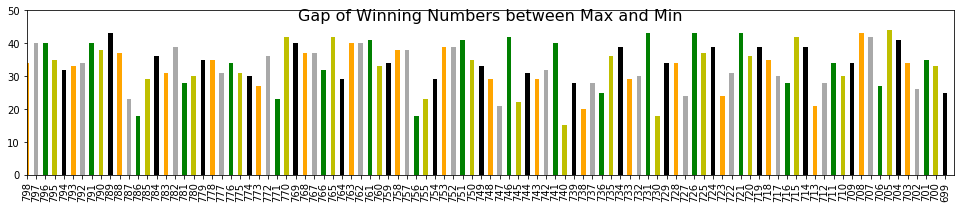

In [5]:
def Draw_SR_gap(SR_gap):
    # Make Graph
    from itertools import cycle, islice

    import matplotlib.pyplot as plt
    import matplotlib
    %matplotlib inline

    my_colors = list(islice(cycle(['orange', 'darkgrey', 'green', 'y', 'k']), None, len(SR_gap)))

    fig = plt.figure()
    plt.text(50, 47, 'Gap of Winning Numbers between Max and Min', horizontalalignment='center', fontsize=16)
    SR_gap[:100].plot(kind='bar', figsize=(13.5,3),  color=my_colors)
    plt.xlim(0,100)  # draw the latest 100 weeks gaps
    plt.ylim((0,50))
    plt.tight_layout()
    plt.show()
    fig.savefig('gap.png', dpi=fig.dpi)

Draw_SR_gap(SR_gap)


<h3> Draw_SR_cnt</h3>

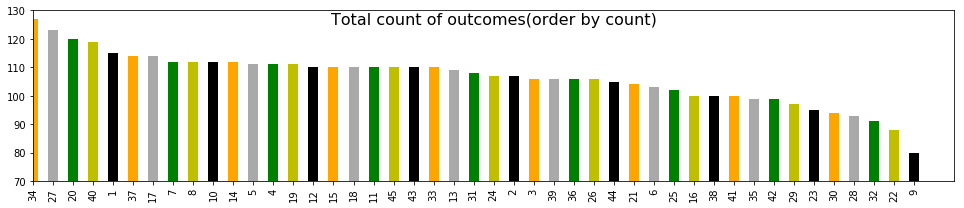

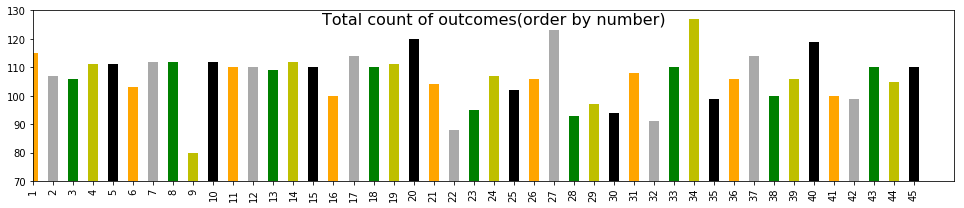

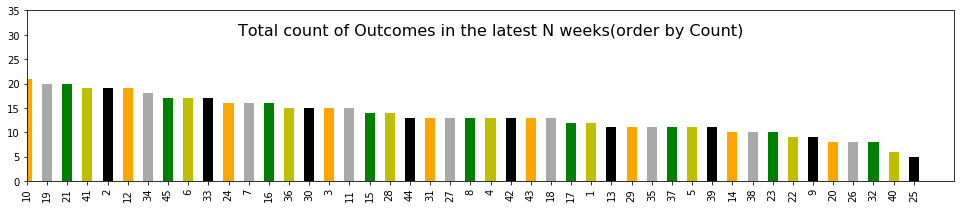

In [6]:
# Make Graph
def Draw_SR_cnt(SR_cnt, SR_Ncnt):
    from itertools import cycle, islice

    import matplotlib.pyplot as plt
    import matplotlib
    %matplotlib inline

    my_colors = list(islice(cycle(['orange', 'darkgrey', 'green', 'y', 'k']), None, len(SR_gap)))

    fig1 = plt.figure()
    #plt.suptitle('Total Count of Outcomes(order by frequency)', fontsize=12)
    plt.text(23,125,'Total count of outcomes(order by count)', horizontalalignment='center', fontsize=16)
    SR_cnt.sort_values(ascending=False).plot(kind='bar', figsize=(13.5,3),  color=my_colors)
    plt.xlim(0,46)
    plt.ylim((70,130))
    plt.tight_layout()
    plt.show()
    fig1.savefig('freq_orderby_freq.png',dpi=fig1.dpi)

    my_colors = list(islice(cycle(['orange', 'darkgrey', 'green', 'y', 'k']), None, len(SR_gap)))

    fig2 = plt.figure()
    #plt.suptitle('Total count of Outcomes(order by number)', fontsize=14)
    plt.text(23,125,'Total count of outcomes(order by number)', horizontalalignment='center', fontsize=16)
    SR_cnt.plot(kind='bar', figsize=(13.5,3),  color=my_colors)
    plt.xlim(0,46)
    plt.ylim((70,130))
    plt.tight_layout()
    plt.show()
    fig2.savefig('freq_1toN.png', dpi=fig2.dpi)

    fig3 = plt.figure()
    plt.text(23,30,'Total count of Outcomes in the latest N weeks(order by Count)', horizontalalignment='center', fontsize=16)
    SR_Ncnt.sort_values(ascending=False).plot(kind='bar', figsize=(13.5,3),  color=my_colors)
    plt.xlim(0,46)
    plt.ylim((0,35))
    plt.tight_layout()
    plt.show()
    fig3.savefig('freqN_orderby_freq.png',dpi=fig1.dpi)

    
    
    
Draw_SR_cnt(SR_cnt, SR_Ncnt)


<h3>Generate Recommended Random Numbers </h3>
<img src="http://www.clipular.com/c/5728872135131136.png?k=TvQwV7xbSl5u6rDDp9fp2AvuOGI">

In [10]:
def Gen_RC1(SR_cnt, SR_Ncnt):
    top6 = SR_cnt.sort_values(ascending=False)[:7].index.tolist()
    top6N = SR_Ncnt.sort_values(ascending=False)[:7].index.tolist()
    return sorted(top6), sorted(top6N)

top6, top6N = Gen_RC1(SR_cnt, SR_Ncnt)   
print 'Recommended List RC1-1 (Most Selected Top 6 Numbers)', top6
print 'Recommended List RC1-2 (Most Selected Top 6 Numbers in the last N weeks)', top6N

Recommended List RC1-1 (Most Selected Top 6 Numbers) [1, 17, 20, 27, 34, 37, 40]
Recommended List RC1-2 (Most Selected Top 6 Numbers in the last N weeks) [2, 10, 12, 19, 21, 34, 41]


In [11]:
def Gen_RC2(SR_cnt):
    import random
    RC2 = []
    rlist = []
    cond_val = SR_cnt.mean(0)
    #for i, v in SR_cnt.iteritems():
    #    if v > cond_val:
    #        rlist.append(i)
    rlist = SR_cnt[SR_cnt > cond_val].index.tolist()
    print 'Candidates Numbers', len(rlist)
    print 'Candidates List', rlist
    for i in range(5):
        rclist = random.sample(rlist, 6)
        for v in rclist:
            selected.add(v)
        RC2.append(sorted(rclist))
    return RC2

selected = set() 
RC2 = Gen_RC2(SR_cnt)
for i in range(len(RC2)):
    print RC2[i]
for v in sorted(selected):
    print v,
print ''

Candidates Numbers 25
Candidates List [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 24, 27, 31, 33, 34, 37, 40, 43, 45]
[11, 13, 17, 27, 34, 40]
[1, 8, 24, 31, 33, 45]
[4, 10, 13, 27, 33, 34]
[5, 8, 19, 27, 40, 43]
[7, 15, 17, 27, 40, 43]
1 4 5 7 8 10 11 13 15 17 19 24 27 31 33 34 40 43 45 


In [12]:
def Gen_RC3(SR_cnt, selected):
    import random
    RC3 = []
    rlist = []
    cond_val = SR_cnt.mean(0)
    #for i, v in SR_cnt.iteritems():
    #    if v < cond_val:
    #        rlist.append(i)
    rlist = SR_cnt[SR_cnt < cond_val].index.tolist()
    print 'Candidates Numbers', len(rlist)
    print 'Candidates List', rlist
    for i in range(5):
        rclist = random.sample(rlist, 6)
        for v in rclist:
            selected.add(v)
        RC3.append(sorted(rclist))
    return RC3

RC3 = Gen_RC3(SR_cnt, selected)
for i in range(len(RC3)):
    print RC3[i]
for v in selected:
    print v,
print ''

Candidates Numbers 20
Candidates List [3, 6, 9, 16, 21, 22, 23, 25, 26, 28, 29, 30, 32, 35, 36, 38, 39, 41, 42, 44]
[3, 22, 23, 30, 38, 42]
[6, 9, 21, 35, 38, 42]
[3, 25, 26, 39, 41, 44]
[16, 22, 28, 38, 39, 44]
[9, 21, 30, 35, 39, 44]
1 3 4 5 6 7 8 9 10 11 13 15 16 17 19 21 22 23 24 25 26 27 28 30 31 33 34 35 38 39 40 41 42 43 44 45 


In [13]:
def Gen_RC4():
    import random
    RC4 = []
    rlist = []
    a = set(range(1,46))
    rlist = list(a - selected)
    print 'rlist', rlist
    
    for i in range(5):
        rclist = random.sample(rlist, 6)
        RC4.append(sorted(rclist))
    return RC4

for v in selected:
    print v,
print ''

RC4 = Gen_RC4()
for i in range(len(RC4)):
    print RC4[i]

1 3 4 5 6 7 8 9 10 11 13 15 16 17 19 21 22 23 24 25 26 27 28 30 31 33 34 35 38 39 40 41 42 43 44 45 
rlist [32, 2, 36, 37, 12, 14, 18, 20, 29]
[14, 18, 20, 29, 32, 37]
[2, 12, 14, 29, 32, 37]
[2, 14, 18, 29, 36, 37]
[2, 12, 14, 29, 32, 36]
[2, 20, 29, 32, 36, 37]


<h2><span style="color: #993300;">Python Class Project Report #2</span></h2>

## [1] Make RC5 Function

<blockquote><span class="parent-word" style="color: #0000ff;" data-transform-scale-x="0.8498908284270901" data-canvas-width="600.89315">such that&nbsp;</span>
<ul>
<li class="parent-word" data-transform-scale-x="0.8498908284270901" data-canvas-width="600.89315">Design and create your own algorithm for generating the recommed numbers</li>
<li class="parent-word" data-transform-scale-x="0.8498908284270901" data-canvas-width="600.89315">Show your data strucutre ( using the draw.io)</li>
<li class="parent-word" data-transform-scale-x="0.8498908284270901" data-canvas-width="600.89315">Show your functional diagram</li>
</ul>
<p>&nbsp;</p>
</blockquote>

## [2] Make CMP_to_winlist

<blockquote><span class="parent-word" style="color: #0000ff;" data-transform-scale-x="0.8498908284270901" data-canvas-width="600.89315">such that&nbsp;</span>
<ul>
<li class="parent-word" data-transform-scale-x="0.8498908284270901" data-canvas-width="600.89315">compare your recommended list to previous winning number list</li>
<li class="parent-word" data-transform-scale-x="0.8498908284270901" data-canvas-width="600.89315">find the most matched list (In best case, 6 numbers matche)</li>
<li class="parent-word" data-transform-scale-x="0.8498908284270901" data-canvas-width="600.89315">find the count of the least matched list ( total count of 0 match)</li>
</ul>
<p>&nbsp;</p>
<p>&nbsp;</p>
</blockquote>